In [2]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.utils import shuffle
import cv2

# Load the images and labels
X = []
y = []

# Load the images of people with glasses
for file in os.listdir('C:\\Users\\Saram Hai\\3D Objects\\Images\\Images\\glasses'):
    # Load the image and resize it to a fixed size
    img = cv2.imread(os.path.join('C:\\Users\\Saram Hai\\3D Objects\\Images\\Images\\glasses', file))
    img = cv2.resize(img, (128, 128))
    X.append(img)
    y.append(1)

# Load the images of people without glasses
for file in os.listdir('C:\\Users\\Saram Hai\\3D Objects\\Images\\Images\\no_glasses'):
    # Load the image and resize it to a fixed size
    img = cv2.imread(os.path.join('C:\\Users\\Saram Hai\\3D Objects\\Images\\Images\\no_glasses', file))
    img = cv2.resize(img, (128, 128))
    X.append(img)
    y.append(0)

# Convert the images and labels to numpy arrays
X = np.array(X)
y = np.array(y)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(X.shape[0], -1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Oversample the training data to balance the classes
X_train, y_train = resample(X_train, y_train, n_samples=len(X_test), random_state=42)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9573170731707317


The person is wearing glasses


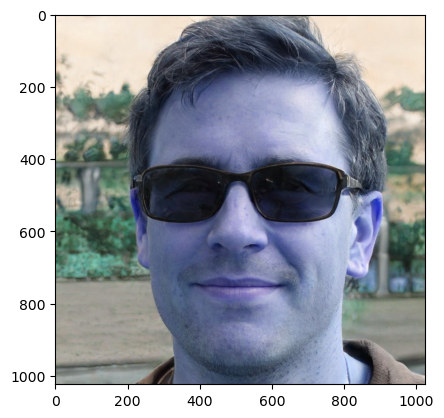

In [10]:
# To classify a new image, you can use the following code:

from matplotlib import pyplot as plt


new_img1 = cv2.imread('C:\\Users\\Saram Hai\\3D Objects\\Images\\Images\\glasses\\face-2.jpg')
new_img = cv2.resize(new_img1, (128, 128))
new_img = scaler.transform(new_img.reshape(1, -1))
prediction = clf.predict(new_img)
plt.imshow(new_img1)
if prediction == 1:
    print('The person is wearing glasses')
else:
    print('The person is not wearing glasses')